# SIR Epidemic Model

## Introduction

The **SIR model** is a foundational compartmental model in epidemiology, first proposed by Kermack and McKendrick in 1927. It divides a population into three mutually exclusive compartments:

- **S (Susceptible)**: Individuals who can contract the disease
- **I (Infected)**: Individuals who have the disease and can transmit it
- **R (Recovered/Removed)**: Individuals who have recovered and are immune (or deceased)

## Mathematical Formulation

The dynamics are governed by the following system of ordinary differential equations:

$$\frac{dS}{dt} = -\beta S I$$

$$\frac{dI}{dt} = \beta S I - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

where:
- $\beta$ is the **transmission rate** (probability of disease transmission per contact)
- $\gamma$ is the **recovery rate** (inverse of the infectious period)
- $S$, $I$, $R$ are fractions of the total population $N$ (i.e., $S + I + R = 1$)

## Basic Reproduction Number

A critical quantity is the **basic reproduction number**:

$$R_0 = \frac{\beta}{\gamma}$$

This represents the average number of secondary infections produced by a single infected individual in a fully susceptible population.

- If $R_0 > 1$: Epidemic outbreak occurs
- If $R_0 < 1$: Disease dies out

## Conservation Law

The total population is conserved:

$$\frac{d}{dt}(S + I + R) = 0$$

This implies $S(t) + I(t) + R(t) = N$ for all time $t$.

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR model differential equations
def sir_model(y, t, beta, gamma):
    """
    SIR model differential equations.
    
    Parameters:
    -----------
    y : array
        Current state [S, I, R]
    t : float
        Current time
    beta : float
        Transmission rate
    gamma : float
        Recovery rate
    
    Returns:
    --------
    dydt : array
        Derivatives [dS/dt, dI/dt, dR/dt]
    """
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

## Parameter Configuration

We set up the simulation with realistic epidemiological parameters:

- **Transmission rate** $\beta = 0.3$ day$^{-1}$
- **Recovery rate** $\gamma = 0.1$ day$^{-1}$ (average infectious period of 10 days)
- **Basic reproduction number** $R_0 = \beta/\gamma = 3.0$

Initial conditions represent a population where 0.1% are initially infected.

In [4]:
# Model parameters
beta = 0.3    # Transmission rate (per day)
gamma = 0.1   # Recovery rate (per day)

# Calculate R0
R0 = beta / gamma
print(f"Basic Reproduction Number R₀ = {R0:.2f}")

# Initial conditions (fractions of population)
I0 = 0.001    # Initial infected fraction
R0_init = 0.0 # Initial recovered fraction
S0 = 1.0 - I0 - R0_init  # Initial susceptible fraction

y0 = [S0, I0, R0_init]

# Time vector (days)
t_max = 160
t = np.linspace(0, t_max, 1000)

print(f"Initial conditions: S₀ = {S0:.3f}, I₀ = {I0:.3f}, R₀ = {R0_init:.3f}")

Basic Reproduction Number R₀ = 3.00
Initial conditions: S₀ = 0.999, I₀ = 0.001, R₀ = 0.000


## Numerical Solution

We solve the system using `scipy.integrate.odeint`, which employs adaptive step-size methods for accurate integration of the ODEs.

In [5]:
# Solve the differential equations
solution = odeint(sir_model, y0, t, args=(beta, gamma))

# Extract S, I, R from solution
S = solution[:, 0]
I = solution[:, 1]
R = solution[:, 2]

# Verify conservation law
total = S + I + R
print(f"Conservation check: max deviation from 1.0 = {np.max(np.abs(total - 1.0)):.2e}")

Conservation check: max deviation from 1.0 = 8.88e-16


## Analysis of Results

### Key Metrics

We compute several important epidemiological quantities:

1. **Peak infection time**: When $dI/dt = 0$
2. **Peak infected fraction**: Maximum value of $I(t)$
3. **Final epidemic size**: $R(\infty)$, the total fraction of population infected
4. **Herd immunity threshold**: $1 - 1/R_0$

In [6]:
# Find peak infection
peak_idx = np.argmax(I)
peak_time = t[peak_idx]
peak_infected = I[peak_idx]

# Final epidemic size
final_recovered = R[-1]

# Herd immunity threshold
herd_immunity = 1 - 1/R0

print("=" * 50)
print("EPIDEMIC ANALYSIS RESULTS")
print("=" * 50)
print(f"Peak infection occurs at day {peak_time:.1f}")
print(f"Peak infected fraction: {peak_infected:.4f} ({peak_infected*100:.2f}%)")
print(f"Final epidemic size: {final_recovered:.4f} ({final_recovered*100:.2f}%)")
print(f"Herd immunity threshold: {herd_immunity:.4f} ({herd_immunity*100:.2f}%)")
print(f"Final susceptible fraction: {S[-1]:.4f} ({S[-1]*100:.2f}%)")
print("=" * 50)

EPIDEMIC ANALYSIS RESULTS
Peak infection occurs at day 38.3
Peak infected fraction: 0.3008 (30.08%)
Final epidemic size: 0.9405 (94.05%)
Herd immunity threshold: 0.6667 (66.67%)
Final susceptible fraction: 0.0595 (5.95%)


## Visualization

We create a comprehensive plot showing the epidemic dynamics, including:
- Time evolution of all three compartments
- Peak infection marker
- Key epidemiological parameters

Plot saved to 'plot.png'


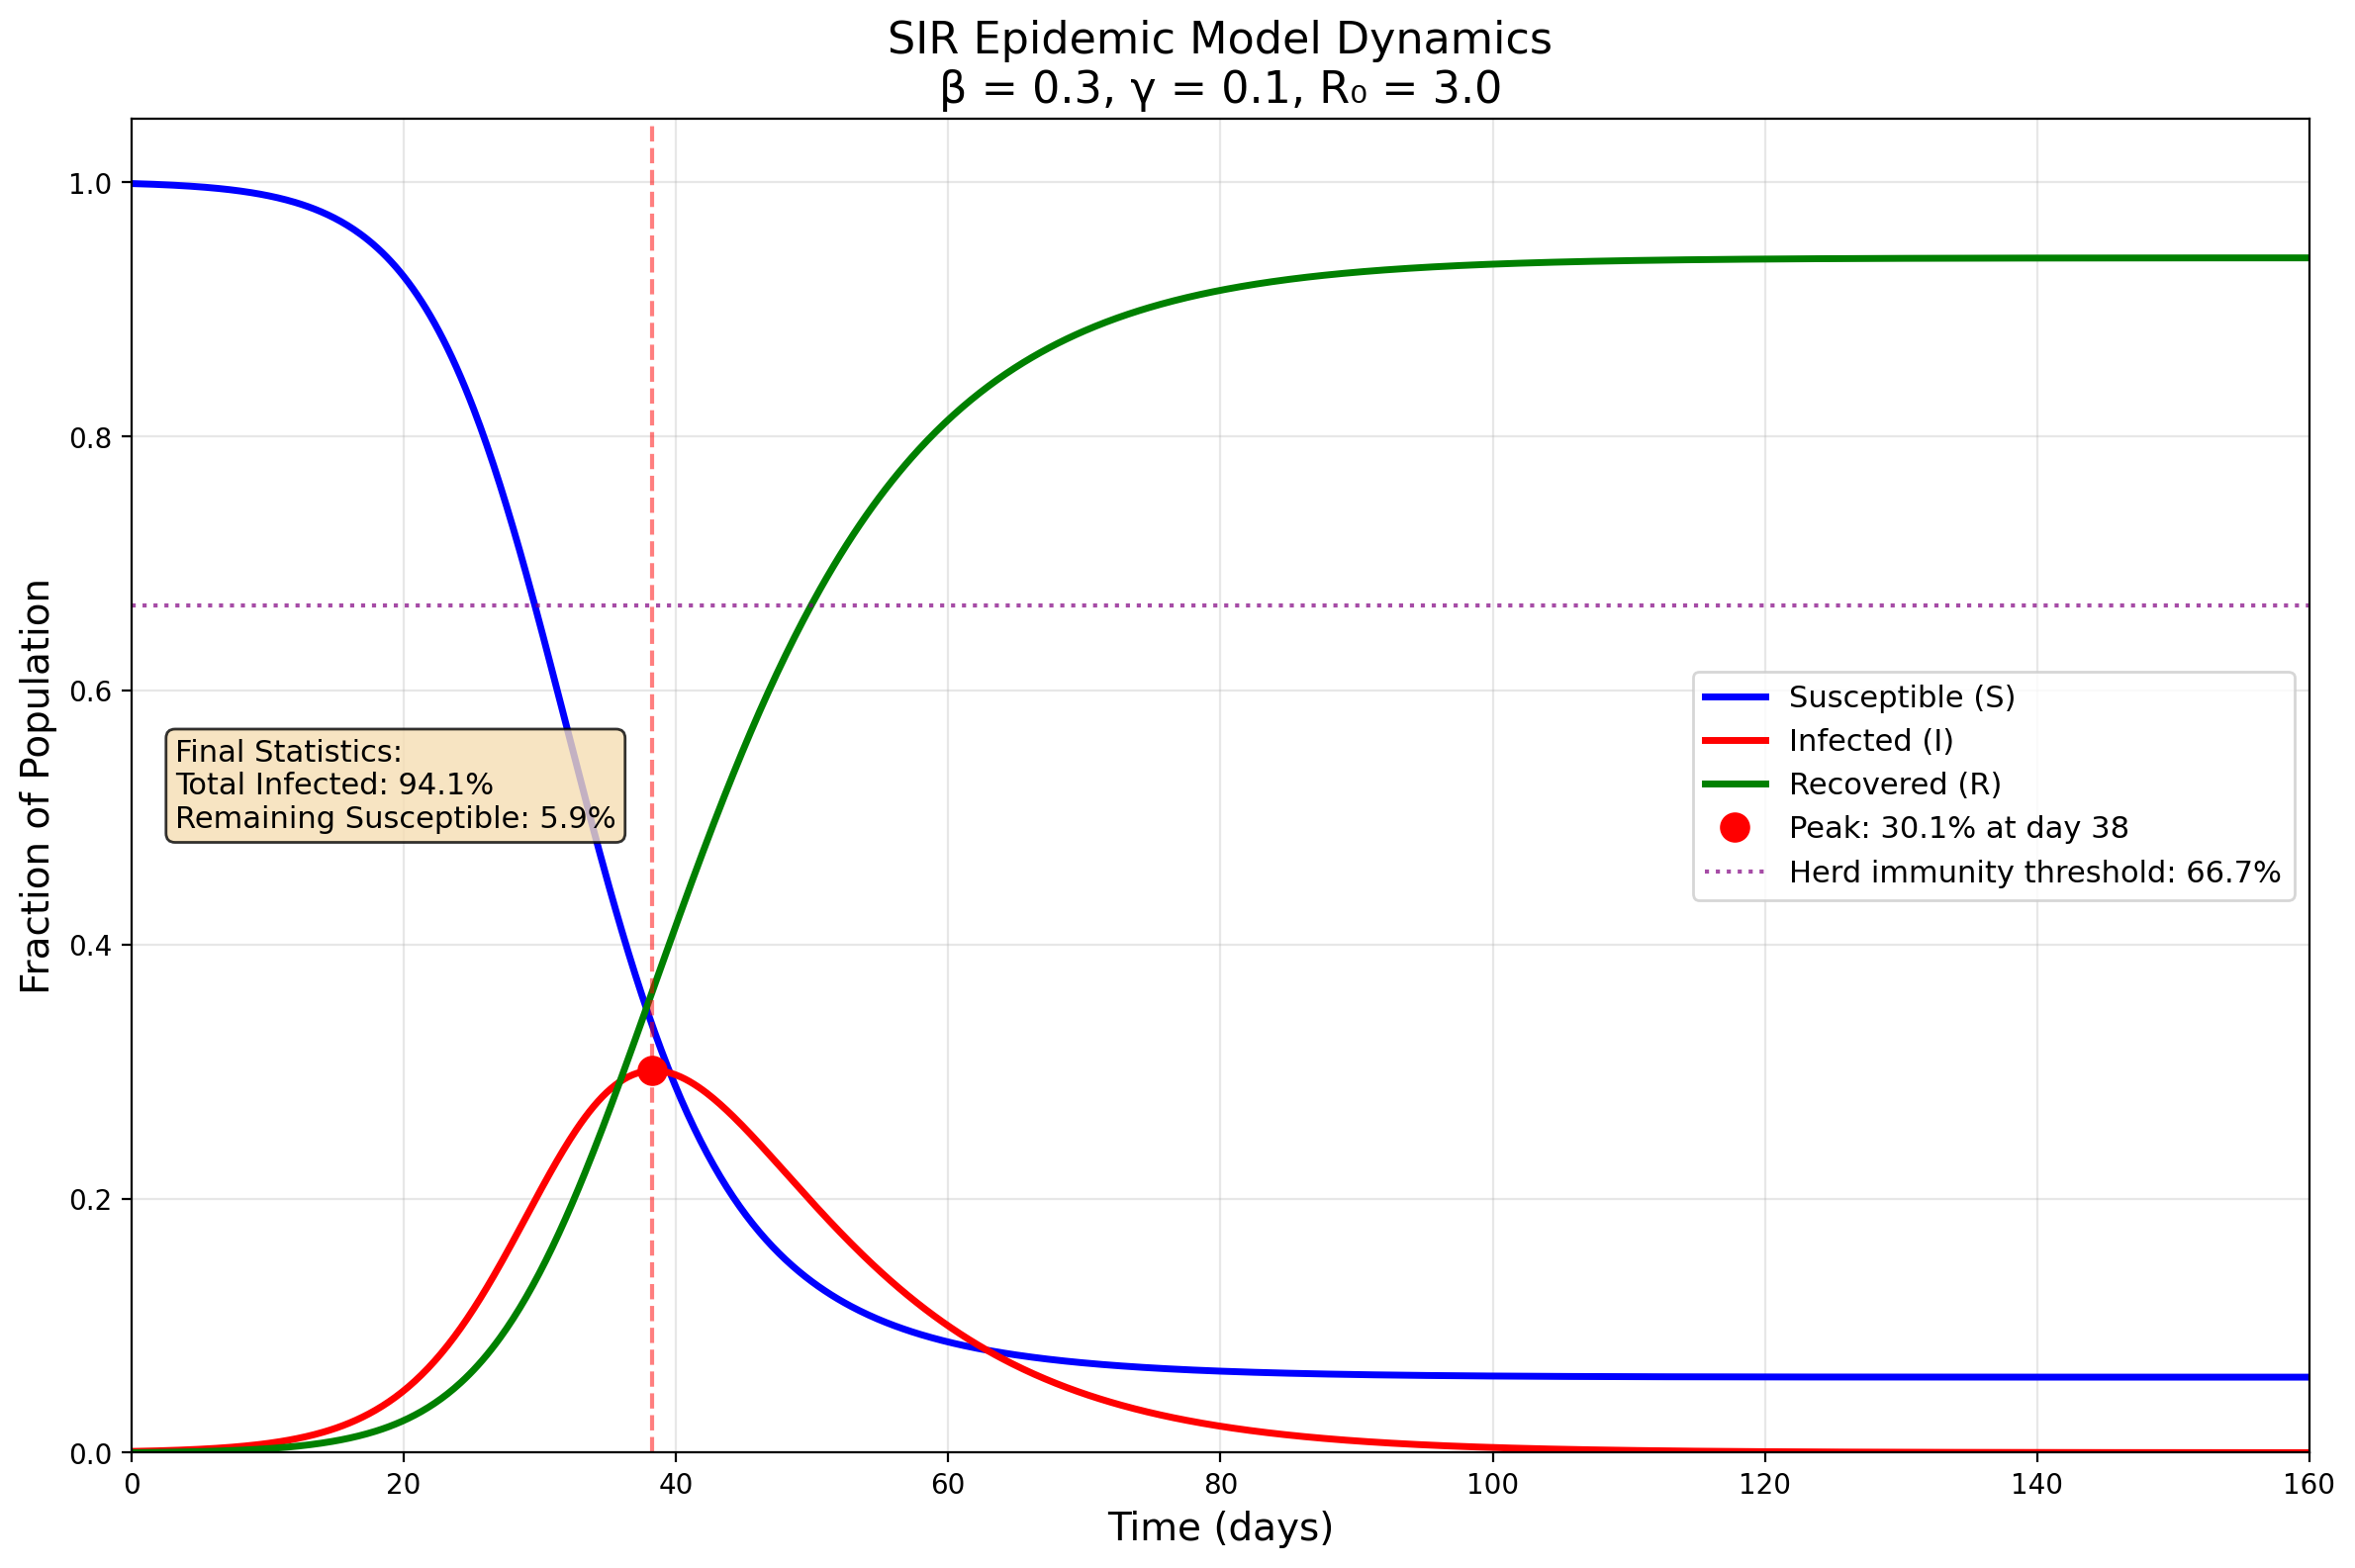

In [7]:
# Create figure with high resolution
fig, ax = plt.subplots(figsize=(12, 8))

# Plot S, I, R curves
ax.plot(t, S, 'b-', linewidth=2.5, label='Susceptible (S)')
ax.plot(t, I, 'r-', linewidth=2.5, label='Infected (I)')
ax.plot(t, R, 'g-', linewidth=2.5, label='Recovered (R)')

# Mark peak infection
ax.axvline(x=peak_time, color='r', linestyle='--', alpha=0.5, linewidth=1.5)
ax.plot(peak_time, peak_infected, 'ro', markersize=10, 
        label=f'Peak: {peak_infected*100:.1f}% at day {peak_time:.0f}')

# Add herd immunity threshold line
ax.axhline(y=herd_immunity, color='purple', linestyle=':', alpha=0.7, linewidth=1.5,
           label=f'Herd immunity threshold: {herd_immunity*100:.1f}%')

# Labels and title
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Fraction of Population', fontsize=14)
ax.set_title(f'SIR Epidemic Model Dynamics\n'
             f'β = {beta}, γ = {gamma}, R₀ = {R0:.1f}', fontsize=16)

# Configure legend and grid
ax.legend(loc='center right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, t_max)
ax.set_ylim(0, 1.05)

# Add text box with final statistics
textstr = f'Final Statistics:\n' \
          f'Total Infected: {final_recovered*100:.1f}%\n' \
          f'Remaining Susceptible: {S[-1]*100:.1f}%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=props)

plt.tight_layout()

# Save the plot
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
print("Plot saved to 'plot.png'")

plt.show()

## Theoretical Insights

### Final Size Equation

The final epidemic size $R_\infty$ satisfies the transcendental equation:

$$R_\infty = 1 - S_0 \exp\left(-R_0 R_\infty\right)$$

This can be solved numerically to predict the total outbreak size without full simulation.

### Phase Plane Analysis

The SIR model exhibits interesting phase plane dynamics. The infection grows only when:

$$\frac{dI}{dt} > 0 \implies S > \frac{\gamma}{\beta} = \frac{1}{R_0}$$

This defines the **epidemic threshold**: an outbreak occurs only if $S_0 > 1/R_0$.

## Conclusions

This simulation demonstrates the classic epidemic dynamics of the SIR model:

1. The susceptible population decreases monotonically
2. The infected population rises to a peak then declines
3. The recovered population increases as a sigmoid curve
4. The epidemic naturally terminates due to depletion of susceptibles

The model, despite its simplicity, captures essential features of epidemic spread and provides the foundation for more complex epidemiological models including SEIR, SEIRS, and age-structured variants.